In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("D:\\Excel R\\Assignments\\Assignment 6\\bank.csv")

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
### Removing the unnecessary columns:- 
data.drop(['day','month','contact'],inplace=True,axis=1)
data

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,unknown,no


<AxesSubplot:xlabel='y', ylabel='count'>

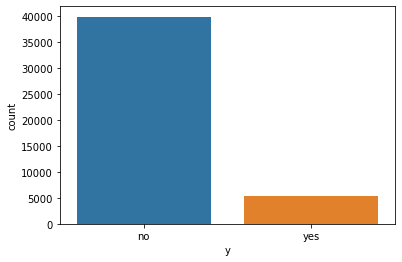

In [9]:
import seaborn as sns
sns.countplot(data=data,x='y')

<AxesSubplot:xlabel='job'>

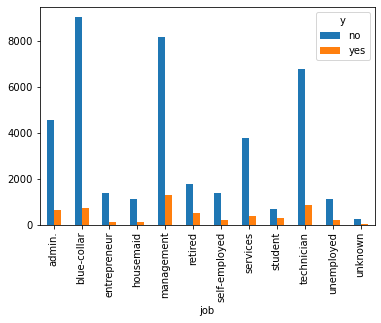

In [10]:
pd.crosstab(data.job,data.y).plot(kind='bar')

In [12]:
y=['y']
data[y]=data[y].apply(LabelEncoder().fit_transform)
newdata=pd.get_dummies(data)
newdata

,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,33,2,76,1,-1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
3,47,1506,92,1,-1,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45207,71,1729,456,2,-1,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45208,72,5715,1127,5,184,3,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
45209,57,668,508,4,-1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1


In [13]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   duration             45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   pdays                45211 non-null  int64
 5   previous             45211 non-null  int64
 6   y                    45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [17]:
nd=newdata.drop(['y'],axis=1)

In [18]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   duration             45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   pdays                45211 non-null  int64
 5   previous             45211 non-null  int64
 6   job_admin.           45211 non-null  uint8
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [21]:
x=nd.iloc[:,0:35]
y=newdata.iloc[:,6]

In [24]:
### Using Train Test Split:-
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [25]:
### Fitting the model:-
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred=regressor.predict(x_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     14325
           1       0.20      0.58      0.30       595

    accuracy                           0.89     14920
   macro avg       0.59      0.74      0.62     14920
weighted avg       0.95      0.89      0.91     14920



In [32]:
print(confusion_matrix(y_test,y_pred))

[[12915   248]
 [ 1410   347]]


Text(0, 0.5, 'True Positive Rate')

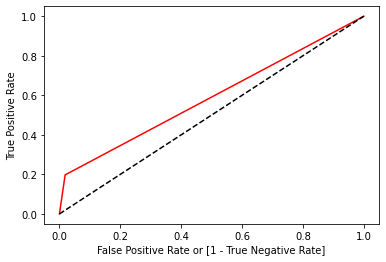

In [34]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.3f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [35]:
auc

0.5893275207739602